<a href="https://colab.research.google.com/github/Laexey/DataScianceLearn/blob/master/%D0%9D%D0%B0%D0%B8%D0%B2%D0%BD%D1%8B%D0%B9_%D0%91%D0%B0%D0%B9%D0%B5%D1%81%D0%BA%D0%BE%D0%B2%D1%81%D0%BA%D0%B8%D0%B9_%D0%BA%D0%BB%D0%B0%D1%81%D1%81%D0%B8%D1%84%D0%B8%D0%BA%D0%B0%D1%82%D0%BE%D1%80_%D0%94%D0%97.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Манипулирование данными

Невозможно что-либо сделать, если мы не умеем манипулировать данными. Две основные операции, которые нам нужно сделать с данными - (i) получить их и (ii) обработать. Нет смысла собирать данные, если мы даже не знаем, как их хранить, поэтому давайте сначала поработаем с синтетическими данными. Мы начнем с torch.tensor. Это основной инструмент для хранения и преобразования данных в torch. Если вы раньше работали с NumPy, вы заметите, что он по своей конструкции очень похож на многомерный массив NumPy. Тем не менее, он даёт несколько ключевых преимуществ. Во-первых, torch.tensor поддерживает асинхронные вычисления на CPU и GPU. Во-вторых, он обеспечивает поддержку автоматического дифференцирования.

Начнем с импорта torch

In [0]:
import torch
import numpy as np


Tensor - есть массив (возможно, многомерный) числовых значений. tensor с одной осью называется (в математике) вектором, с двумя - матрицей. Для массивов с более чем двумя осями нет специальных имен - их называют просто тензорами.
Самый простой объект, который мы можем создать - это вектор. Для начала мы можем использовать arange для создания вектора строки с 12 последовательными целыми числами.

In [0]:
x = torch.arange(12)
x

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [0]:
x[x==1]

tensor([1])

Мы можем получить форму экземпляра tensor через свойство shape.

In [0]:
x.shape

torch.Size([12])

Узнать расположен ли он на gpu или cpu можно через специальный аттрибут - device

In [0]:
x.device

device(type='cpu')

Мы используем функцию view, чтобы изменить форму одного (возможно многомерного) массива на другой, который содержит такое же количество элементов. Например, мы можем преобразовать форму нашего векторного вектора x в (3, 4), который содержит те же значения, но интерпретирует их как матрицу, содержащую 3 строки и 4 столбца. Обратите внимание, что, хотя форма изменилась, элементы в x не изменились. Причем количество элементов осталось прежним.

In [0]:
x.view((3,4))

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])

Указывать каждое измерение вручную достаточно утомительно. К счастью, torch может автоматически выводить одно измерение, учитывая другие. Мы можем указать -1 для измерения, которое мы хотели бы, чтобы torch автоматически выводил. В нашем случае вместо x.view((3, 4)) мы могли бы использовать x.view ((- 1, 4)) или x.view((3, -1)).

In [0]:
x.view((-1, 4))

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])

Другие две полезные функции - zeros и ones. Они создают массивы из всех нулей и всех единиц. Они принимают форму создаваемого тензора в качестве параметра

In [0]:
torch.zeros((2,3,4))

tensor([[[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]])

In [0]:
torch.ones((2,3,4))

tensor([[[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]],

        [[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]]])

Конечно же, можно создать тензор явно указав все значения

In [0]:
torch.tensor([[1,2,3], [4,5,6]])

tensor([[1, 2, 3],
        [4, 5, 6]])

Иногда бывает полезно создать массив, заполненный случайными значениями. Для этого используются функции torch.rand и torch.randn. Первое использовает равномерное распределение, второе - нормальное

In [0]:
torch.rand((2,3,4))

tensor([[[0.0708, 0.2296, 0.4450, 0.9017],
         [0.1158, 0.2667, 0.5985, 0.5189],
         [0.9540, 0.8991, 0.8680, 0.5266]],

        [[0.5922, 0.8190, 0.6019, 0.6009],
         [0.2222, 0.6272, 0.1245, 0.8057],
         [0.5222, 0.7053, 0.6654, 0.1968]]])

In [0]:
torch.randn((2,3,4))

tensor([[[ 0.4575, -0.3773,  1.9346, -0.6318],
         [ 1.4211, -0.3359, -0.1955, -0.0635],
         [ 0.4617, -0.6983, -0.2001,  1.7809]],

        [[ 0.8504, -0.5344, -0.3417,  1.0650],
         [-0.5269,  0.2748, -0.3814, -0.7334],
         [-1.1421, -0.9808,  0.6546,  0.8337]]])

## Операции

Обычно мы хотим не только создавать массивы, но и применять к ним функции. Самые простые и полезные из них - это поэлементные функции. Они работают, выполняя одну скалярную операцию над соответствующими элементами двух массивов. 

In [0]:
x = torch.tensor([1., 2., 4., 8.])
y = torch.ones_like(x) * 2
print('x =', x)
print('y =', y)
print('x + y', x + y)
print('x - y', x - y)
print('x * y', x * y)
print('x / y', x / y)

x = tensor([1., 2., 4., 8.])
y = tensor([2., 2., 2., 2.])
x + y tensor([ 3.,  4.,  6., 10.])
x - y tensor([-1.,  0.,  2.,  6.])
x * y tensor([ 2.,  4.,  8., 16.])
x / y tensor([0.5000, 1.0000, 2.0000, 4.0000])


Еще больше операций может быть выполненно поэлементно. Например - операции exp

In [0]:
x.exp()

tensor([2.7183e+00, 7.3891e+00, 5.4598e+01, 2.9810e+03])

В дополнение к поэлементным вычислениям, мы также можем выполнять матричные операции. Например, матричное умножение. Для этого используется функция mm.

In [0]:
x = torch.arange(12).reshape((3,4))
y = torch.tensor([[2, 1, 4, 3], [1, 2, 3, 4], [4, 3, 2, 1]])
torch.mm(x, y.T)

tensor([[ 18,  20,  10],
        [ 58,  60,  50],
        [ 98, 100,  90]])

Мы также можем объединить несколько тензоров. Для этого нам нужно указать, по какому измерению производить объединение. В приведенном ниже примере объединяются две матрицы по измерению 0 (по строкам) и измерению 1 (по столбцам) соответственно.

In [0]:
torch.cat((x, y), dim=0)

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11],
        [ 2,  1,  4,  3],
        [ 1,  2,  3,  4],
        [ 4,  3,  2,  1]])

In [0]:
torch.cat((x, y), dim=1)

tensor([[ 0,  1,  2,  3,  2,  1,  4,  3],
        [ 4,  5,  6,  7,  1,  2,  3,  4],
        [ 8,  9, 10, 11,  4,  3,  2,  1]])

Для получения булевых тензоров можно использовать булевы операторы. Например, можно сравнить два тензора при помощи оператора ==

In [0]:
x == y

tensor([[False,  True, False,  True],
        [False, False, False, False],
        [False, False, False, False]])

Суммирование всех элементов тезора дает тензор с одним элементом.

In [0]:
x.sum()

tensor(66)

Мы можем преобразовать результат в скаляр в Python, используя функцию item

In [0]:
x.sum().item()

66

## Broadcast 

Выполнять операции можно не только с тензорами одинакового размера, но и разного. Когда их формы различаются, запускается механизм broadcast'а: Сначала элементы копируются соответствующим образом, чтобы два тензора имели одинаковую форму, а затем операции выполняются поэлементно.

In [0]:
a = torch.arange(3).reshape((3, 1))
b = torch.arange(2).reshape((1, 2))
a, b

(tensor([[0],
         [1],
         [2]]), tensor([[0, 1]]))

Поскольку a и b являются матрицами (3x1) и (1x2) соответственно, их формы не совпадают. Torch решает эту проблему путем broadcast'а значений обеих матриц в большую (3x2) матрицу следующим образом: для матрицы a он реплицирует столбцы, для матрицы b он реплицирует строки. После чего запускается операция сложения

In [0]:
a + b

tensor([[0, 1],
        [1, 2],
        [2, 3]])

## Индексирование

Как и в любом другом массиве Python, элементы в тензоре могут быть доступны по их индексу. По традиции первый элемент имеет индекс 0, а диапазоны указываются для включения первого, но не последнего элемента. По этой логике `1: 3` выбирает второй и третий элемент из тензора

In [0]:
x

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])

In [0]:
x[1:3]

tensor([[ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])

Мы так же можем изменять значения в тензоре

In [0]:
x[1, 2] = 9
x

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  9,  7],
        [ 8,  9, 10, 11]])

Если мы хотим присвоить нескольким элементам одно и то же значение, мы просто индексируем все из них (при помощи оператора `:`), а затем присваиваем им значение. Например, `[0:2,:]` обращается к первой и второй строчкам.

In [0]:
x[0:2, :] = 12
x

tensor([[12, 12, 12, 12],
        [12, 12, 12, 12],
        [ 8,  9, 10, 11]])

## В numpy и назад

In [0]:
x.numpy()

array([[12, 12, 12, 12],
       [12, 12, 12, 12],
       [ 8,  9, 10, 11]])

In [0]:
y = torch.tensor(x.numpy())
y

tensor([[12, 12, 12, 12],
        [12, 12, 12, 12],
        [ 8,  9, 10, 11]])

## Немного практики

1. Матрица B называется обратной к матрице A, если A*B = I (где I - единичная матрица). Найдите (перебором) обратную к матрице A = ((1,1), (1,2))
2. Примениете оператор преобразования A = ((1,2), (3,4)) к квадрату с вершинами в точка (1,1), (1,-1), (-1, -1), (-1, 1) и найдите расстояния между получившимся вершинами

In [0]:
A = torch.tensor([[1,1], [1,2]])
B = torch.tensor([[2, -1],[-1, -1]])
A*B

tensor([[ 2, -1],
        [-1, -2]])

In [0]:
I = torch.ones(2,2)

In [0]:
A.mm(B)

tensor([[ 1, -2],
        [ 0, -3]])

## Вероятности

In [0]:
# Равномерное распределение вероятности

In [0]:
torch.rand(10)

tensor([0.1405, 0.2415, 0.2279, 0.4971, 0.1087, 0.8297, 0.9158, 0.8842, 0.0378,
        0.2914])

In [0]:
## Нормальное распределение

In [0]:
torch.randn(10)

tensor([-1.6518,  0.0930, -0.5957,  0.4115, -0.5774,  0.0330, -0.4367, -0.0175,
        -0.5799,  1.5501])

In [0]:
## Равномерное на целых числах

In [0]:
torch.randint(0, 10, (10,))

tensor([1, 1, 3, 7, 0, 7, 0, 1, 7, 5])

## Постройте график плотности для нормального распределения

## Теорема Баеса

In [0]:
import torchvision

In [0]:
def transform(data):
    data = torch.tensor(data.getdata(), dtype=torch.float32)
    return torch.floor(data / 128.).squeeze(axis=-1)

In [5]:
mnist_train = torchvision.datasets.MNIST('.', train=True, transform=transform, download=True)
mnist_test  = torchvision.datasets.MNIST('.', train=False, transform=transform, download=True)

0it [00:00, ?it/s]

9920512it [00:01, 8951390.41it/s]                            


Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw


  0%|          | 0/28881 [00:00<?, ?it/s]

32768it [00:00, 141077.19it/s]           
  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw


1654784it [00:00, 2319164.23it/s]                            
0it [00:00, ?it/s]

Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw


8192it [00:00, 53227.09it/s]            


Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw
Processing...
Done!


In [0]:
mnist_train[0]

AttributeError: ignored

In [0]:
len(mnist_test)

10000

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
mnist_train[0][0]

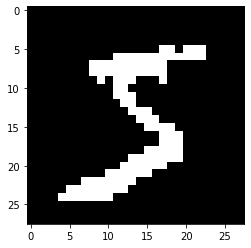

In [0]:
plt.imshow(mnist_train[0][0].reshape(28, 28), cmap='gray', vmin=0, vmax=1)

## Практика - реализуйте сами (без использования SKLEARN) наивный баесовский классификатор для этой задачи

**Для удобства извлекаем данные**

In [0]:
def extract_data(X, y, data):
  for (a, b), n in zip(data, range(len(data))):
    X[n] = a
    y[n] = b

In [0]:
X_train = torch.zeros([60000, 784])
X_test = torch.zeros([10000, 784])
y_train = np.zeros(60000)
y_test = np.zeros(10000)

extract_data(X_train, y_train, mnist_train)
extract_data(X_test, y_test, mnist_test)


**Фильтруем по 1 и 2**

In [0]:
mask_train = np.isin(y_train, [1,2])
mask_test = np.isin(y_test, [1,2])

X_train_12 = X_train[mask_train]
X_test_12 = X_test[mask_test]

y_train_12 = y_train[mask_train]
y_test_12 = y_test[mask_test]

**Подготовка данных**

In [0]:
count_all = y_train_12.shape[0]

count_1 = y_train_12[np.isin(y_train_12, 1)].shape[0]
count_2 = count_all - count_1

#prior probability
freq1 = count_1/count_all
freq2 = 1 - freq1

In [0]:
sum_all_X = X_train_12.sum(axis=0)
sum_1_X = X_train_12[np.isin(y_train_12, 1)].sum(axis=0)
sum_2_X = sum_all_X - sum_1_X

In [0]:
prob1 = (sum_1_X)/count_1
prob2 = (sum_2_X)/count_2

**Предсказание на обучающей выборке**

In [127]:
predict_train = []
for n in range(len(X_train_12)):
  p1 = np.log(freq1) + np.log(np.exp(np.absolute(np.log(prob1*X_train_12[n]+1)-np.log(freq1))).sum())
  p2 = np.log(freq2) + np.log(np.exp(np.absolute(np.log(prob2*X_train_12[n]+1)-np.log(freq2))).sum())
  if p1 > p2: predict_train.append(1)
  else: predict_train.append(2)

np.unique(predict_train == y_train_12, return_counts=True)[1][1]/len(y_train_12)

0.8781102362204725

**Предсказание на тестовой выборке**

In [128]:
predict_test = []
for n in range(len(X_test_12)):
  p1 = np.log(freq1) + np.log(np.exp(np.absolute(np.log(prob1*X_test_12[n]+1)-np.log(freq1))).sum())
  p2 = np.log(freq2) + np.log(np.exp(np.absolute(np.log(prob2*X_test_12[n]+1)-np.log(freq2))).sum())
  if p1 > p2: predict_test.append(1)
  else: predict_test.append(2)

np.unique(predict_test == y_test_12, return_counts=True)[1][1]/len(y_test_12)

0.8827872634979234

In [129]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_12, predict_train)

array([[5208, 1534],
       [  14, 5944]])